In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='gpt2'

In [3]:
results = {'acc':[],
           'f1':[],
           'a':[]}

In [4]:
r = 4
lora_alpha = [4,8,16,32]
lora_dropout = 0.0
lr = 1.0e-4
wd = 0.0

for a in lora_alpha:
    print(f'Grid search {model_checkpoint}, lr: {lr}. Weight decay {wd}. Lora rank: {r}. Lora alpha: {a}')
    data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,
                                num_labels=data.num_labels,
                                lora=True,
                                r=r,
                                alpha=a,
                                dropout=lora_dropout)
    trainer = Engine(epochs=10,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    acc, f1 = trainer.run(lr=lr,
                          wd=wd,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          early_stop=3)
    results['acc'].append(acc)
    results['f1'].append(f1)
    results['a'].append(a)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, acc, f1

Grid search gpt2, lr: 0.0001. Weight decay 0.0. Lora rank: 4. Lora alpha: 4


Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/mnt/software/miniconda3/lib/python3.11/site-packages/peft/tuners/lora/model.py:301: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	1.6023	Val Loss:	1.2169	Accuracy:	0.6980	F1:	0.4437
2 / 10: Train Loss:	0.8167	Val Loss:	0.9332	Accuracy:	0.7112	F1:	0.4433
3 / 10: Train Loss:	0.6896	Val Loss:	0.7499	Accuracy:	0.7243	F1:	0.4558
4 / 10: Train Loss:	0.6333	Val Loss:	0.6541	Accuracy:	0.7309	F1:	0.4449
5 / 10: Train Loss:	0.6126	Val Loss:	0.6021	Accuracy:	0.7396	F1:	0.4486
6 / 10: Train Loss:	0.5836	Val Loss:	0.5794	Accuracy:	0.7462	F1:	0.4514
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       1.00      0.03      0.05       119
      struct       0.74      1.00      0.85       338

    accuracy                           0.75       457
   macro avg       0.87      0.51      0.45       457
weighted avg       0.81      0.75      0.64       457

test results:
              precision    recall  f1-score   support

       bknow       0.00      0.00      0.00        67
      struct       0.74      1

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/mnt/software/miniconda3/lib/python3.11/site-packages/peft/tuners/lora/model.py:301: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	1.5141	Val Loss:	1.1803	Accuracy:	0.6893	F1:	0.4337
2 / 10: Train Loss:	0.7912	Val Loss:	0.8286	Accuracy:	0.7112	F1:	0.4560
3 / 10: Train Loss:	0.6638	Val Loss:	0.6850	Accuracy:	0.7133	F1:	0.4570
4 / 10: Train Loss:	0.6145	Val Loss:	0.6204	Accuracy:	0.7177	F1:	0.4394
5 / 10: Train Loss:	0.6001	Val Loss:	0.5913	Accuracy:	0.7352	F1:	0.4539
6 / 10: Train Loss:	0.5782	Val Loss:	0.5769	Accuracy:	0.7418	F1:	0.4569
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.57      0.03      0.06       119
      struct       0.74      0.99      0.85       338

    accuracy                           0.74       457
   macro avg       0.66      0.51      0.46       457
weighted avg       0.70      0.74      0.65       457

test results:
              precision    recall  f1-score   support

       bknow       0.00      0.00      0.00        67
      struct       0.74      0

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/mnt/software/miniconda3/lib/python3.11/site-packages/peft/tuners/lora/model.py:301: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	1.4059	Val Loss:	1.0401	Accuracy:	0.6871	F1:	0.4609
2 / 10: Train Loss:	0.7638	Val Loss:	0.7520	Accuracy:	0.7024	F1:	0.4518
3 / 10: Train Loss:	0.6440	Val Loss:	0.6450	Accuracy:	0.7112	F1:	0.4736
4 / 10: Train Loss:	0.6027	Val Loss:	0.6066	Accuracy:	0.7199	F1:	0.4664
5 / 10: Train Loss:	0.5925	Val Loss:	0.5892	Accuracy:	0.7265	F1:	0.4634
6 / 10: Train Loss:	0.5735	Val Loss:	0.5777	Accuracy:	0.7374	F1:	0.4687
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.46      0.05      0.09       119
      struct       0.75      0.98      0.85       338

    accuracy                           0.74       457
   macro avg       0.60      0.51      0.47       457
weighted avg       0.67      0.74      0.65       457

test results:
              precision    recall  f1-score   support

       bknow       0.40      0.03      0.06        67
      struct       0.74      0

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/mnt/software/miniconda3/lib/python3.11/site-packages/peft/tuners/lora/model.py:301: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	1.2640	Val Loss:	0.8668	Accuracy:	0.6455	F1:	0.4618
2 / 10: Train Loss:	0.6934	Val Loss:	0.6678	Accuracy:	0.6783	F1:	0.4760
3 / 10: Train Loss:	0.6114	Val Loss:	0.6246	Accuracy:	0.6937	F1:	0.5116
4 / 10: Train Loss:	0.5840	Val Loss:	0.6107	Accuracy:	0.6893	F1:	0.5047
5 / 10: Train Loss:	0.5836	Val Loss:	0.5981	Accuracy:	0.7046	F1:	0.5008
6 / 10: Train Loss:	0.5650	Val Loss:	0.5888	Accuracy:	0.7177	F1:	0.5089
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.38      0.13      0.19       119
      struct       0.75      0.93      0.83       338

    accuracy                           0.72       457
   macro avg       0.56      0.53      0.51       457
weighted avg       0.65      0.72      0.66       457

test results:
              precision    recall  f1-score   support

       bknow       0.42      0.12      0.19        67
      struct       0.75      0

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

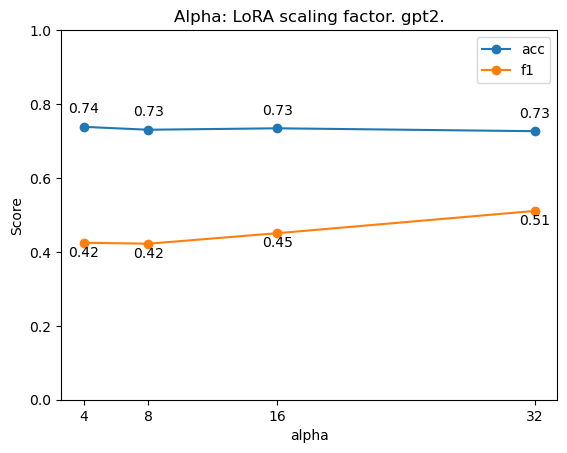

In [6]:
def plot_grid_search(df, title):

    # Create the plot
    ax = df.plot(x='a', y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row["a"], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row["a"], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df['a'], [val for val in df['a']], ha='center')
    # plt.xscale('log')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('alpha')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Alpha: LoRA scaling factor. {model_checkpoint}.')